### Homework 3
### Dimensionality Reduction and Clustering

-----------


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Do not import any other libraries. You can add libraries only for visualizations.

from kmeans import KMeans

### K-Means Clustering
* Fill the functions from kmeans.py
* Use the below cells to validate your implementations for each function using simple inputs. **Do not change the cells.** These cells are given to make sure you wrote all the functions correctly before creating the K-Means model.

In [2]:
n_clusters = 3

In [3]:
# Validate the function "mean"
data = np.array([[1.1, 1, 1, 0.5], [4, 3.14, 2, 1], [0, 0, 0, 0]])
km = KMeans(data, n_clusters)
print(km.mean(data))

[1.7, 1.3800000000000001, 1.0, 0.5]


In [4]:
# Validate the function "std"
print(km.std())

[2.0663978319771825, 1.604119696282045, 1.0, 0.5]


In [5]:
# Validate the function "standard_scaler"
print(km.standard_scaler())

[[-0.29036035 -0.23689005  0.          0.        ]
 [ 1.11304801  1.09717498  1.          1.        ]
 [-0.82268766 -0.86028493 -1.         -1.        ]]


In [6]:
# Validate the function "euclidean_distance"
print(km.euclidean_distance(data[0], data[1]))

3.7735394525564456


In [7]:
# Validate the function "get_closest_centroid"
km.centroids = [[1, 1, 1, 1],[2, 2, 2, 2]]
print(km.get_closest_centroid(data[0]))

0


In [8]:
# Validate the function "update_clusters"
km.X = [[1.1, 1, 1, 1.2], [4, 2, 2, 1.5], [0, 0, 0, 0]]
km.centroids = [[1, 1, 1, 1], [2, 2, 2, 2], [6, 6, 6, 6]]
print(km.update_clusters())

{'0': [[1.1, 1, 1, 1.2], [0, 0, 0, 0]], '1': [[4, 2, 2, 1.5]], '2': []}


In [9]:
km.update_centroids(km.update_clusters())
print(km.centroids)

[[0.55 0.5  0.5  0.6 ]
 [4.   2.   2.   1.5 ]
 [6.   6.   6.   6.  ]]


In [10]:
c1 = {0: [[1.1, 1], [0, 0]],
                    1: [[4, 2]]}
c2 = {0: [[1.1, 1], [0, 0]],
                        1: [[4, 2]]}
print(km.converged(c1, c2))

c1 = {0: [[1.1, 1], [0, 2]],
                    1: [[6, 7]]}
c2 = {0: [[1.1, 1], [0, 0]],
                        1: [[4, 2]]}
print(km.converged(c1, c2))

True
False


### Dimensionality Reduction using PCA
* **TODO**: Fill the below function called pca.
* Do not use libraries other than numpy.

In [11]:
def pca(X, n_components):
    """
    Perform Principal Component Analysis (PCA) on the given data.

    :param X: Input data matrix of shape (n_samples, n_features)
    :param n_components: Number of principal components to keep
    :return: Transformed data matrix of shape (n_samples, n_components)
    """

    # Standardizing the data
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_centered = (X - mean) / std

    # Computing the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Computing eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sorting eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Selecting the top n_components
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Transforming the data
    X_pca = np.dot(X_centered, selected_eigenvectors)

    return X_pca


### Fit K-Means Clustering
* Fill the "fit" function in kmeans.py and run the K-Means Clustering.
* Run the model with different *k* values.
    * *k* = 3, 5, 7, 9
* Save the results (clusters, centroids)
* Use MNIST-1D dataset. 

In [12]:
# Load the dataset

from urllib.request import urlopen
import pickle

url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
data = pickle.load(urlopen(url))

print(data['x'].shape)
X = data['x']

(4000, 40)


In [13]:
X = pca(X, 2)

In [14]:
km_3 = KMeans(X, 3)
clusters_3, centroids_3, wcss_3 = km_3.fit()

Converged in 33 steps.


In [15]:
km_5 = KMeans(X, 5)
clusters_5, centroids_5, wcss_5 = km_5.fit()

Converged in 61 steps.


In [16]:
km_7 = KMeans(X, 7)
clusters_7, centroids_7, wcss_7 = km_7.fit()

Converged in 37 steps.


In [17]:
km_9 = KMeans(X, 9)
clusters_9, centroids_9, wcss_9 = km_9.fit()

Converged in 29 steps.


In [18]:
km_11 = KMeans(X, 11)
clusters_11, centroids_11, wcss_11 = km_11.fit()

Converged in 34 steps.


In [19]:
km_13 = KMeans(X, 13)
clusters_13, centroids_13, wcss_13 = km_13.fit()

Converged in 24 steps.


## Visualization
* **TODO**: Plot the clusters for each cluster where *k*= 3, 5, 7, 9, 11, 13.
* You can check the example plot, which shows three clusters on a different dataset.
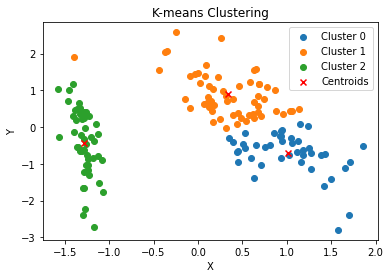

In [44]:
def print_clusters(clusters, centroids):
    """
    Plot the data points according to their clusters.
    The data points within the same clusters should have the same color. 
    Otherwise they should have different colors.
    Don't forget to mark the cluster centroids
    
    :params: clusters
    :params: centroids
    """

    # Creating a figure with a specified size
    plt.figure(figsize=(8, 6))
    
    # Defining a list of colors to be used for different clusters
    colors = ['orange', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'grey', 'navy', 'navajowhite', 'olive', 'deepskyblue', 'teal']
    

    # Iterating over each cluster and its corresponding points
    for cluster_idx, cluster_points in clusters.items():
        color = colors[int(cluster_idx) % len(colors)]          # Selecting a color for the cluster based on its index
        cluster_points = np.array(cluster_points)               # Converting the list of cluster points to a numpy array for plotting
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {cluster_idx}')
    

    centroids = np.array(centroids)     # Converting the centroids to a numpy array for plotting

    # Plotting
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
    
    plt.title('K-Means Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(False)  
    plt.legend()
    plt.show()


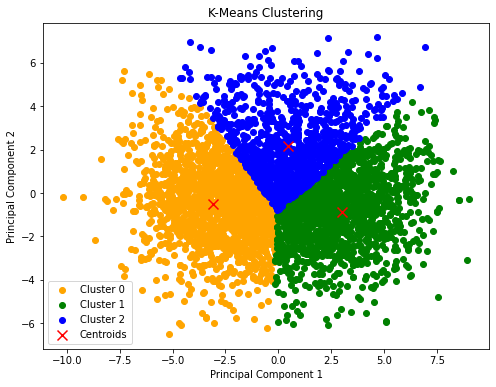

In [37]:
print_clusters(clusters_3, centroids_3)

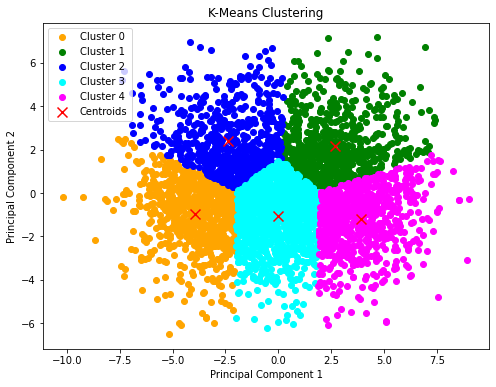

In [38]:
print_clusters(clusters_5, centroids_5)

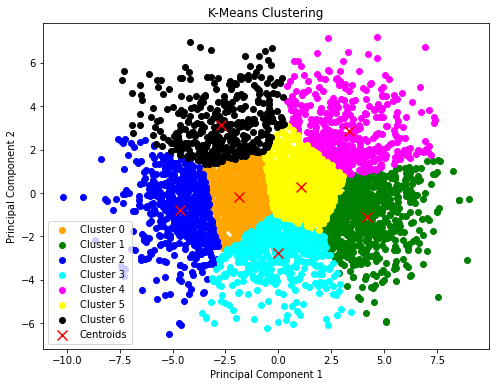

In [39]:
print_clusters(clusters_7, centroids_7)

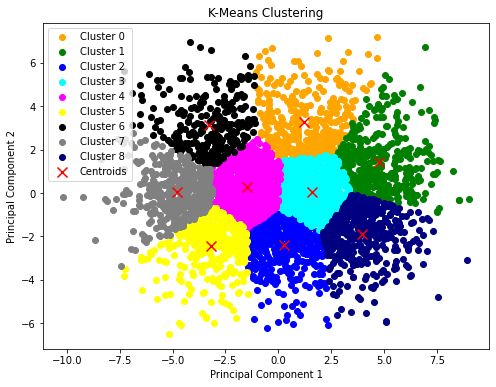

In [40]:
print_clusters(clusters_9, centroids_9)

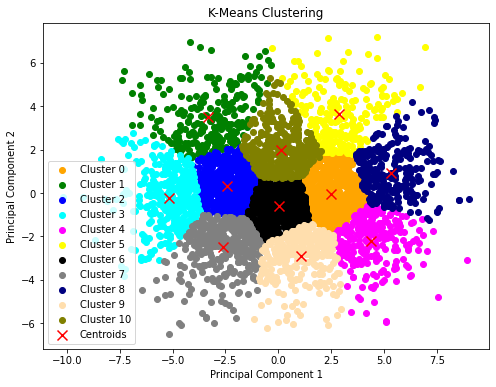

In [41]:
print_clusters(clusters_11, centroids_11)

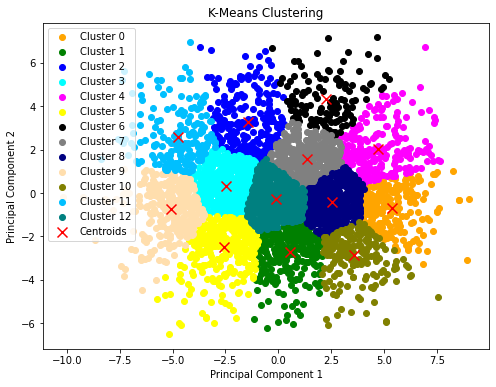

In [42]:
print_clusters(clusters_13, centroids_13)

## WCSS
* Obtain Within-Cluster Sum of Squares (WCSS) with different *k* values.
* Plot the results.
* Explain why WCSS can be used. What does the result mean to us? How can we decide the best *k* value. Interpret the plot. Write your comments.

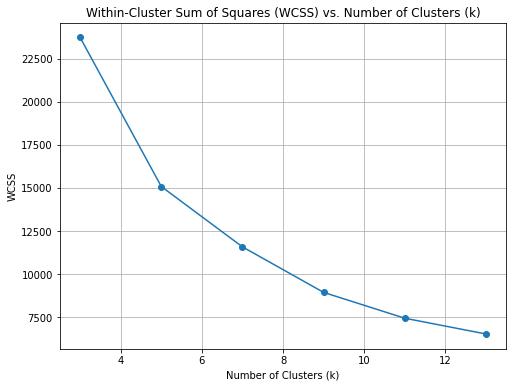

In [43]:
# WCSS
# Defining the list of k values and corresponding WCSS values
k_values = [3, 5, 7, 9, 11, 13]         
wcss_values = [wcss_3, wcss_5, wcss_7, wcss_9, wcss_11, wcss_13]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Write your comments here:

*WCSS can be used as a metric to evaluate the quality of clustering when deciding the number of clusters (k). WCSS measures the compactness of clusters, indicating how close the data points are to the centroids within each cluster.*

*In the plot, we observe that as the number of clusters increases, the WCSS tends to decrease. This is because increasing the number of clusters allows the centroids to better fit the data points, resulting in smaller distances between the points and their respective centroids. However, after a certain point, the rate of decrease in WCSS slows down, and adding more clusters doesn't significantly reduce WCSS.*

*We can decide the best k value by looking for the "elbow point" in the WCSS plot. The elbow point is the point where the rate of decrease in WCSS sharply changes. This point represents the optimal balance between minimizing WCSS and preventing overfitting. In the plot, we can see that the elbow point occurs around k = 5 or 7. Therefore, we might choose 5 or 7 clusters as the optimal number depending on the specific context of our problem.*